# Analysis of an experiment demo

In [1]:
from midastouch.analyzer import Analyzer
import os

Choose an experiment that we want to analyze and load the data:

In [13]:
dir = os.getcwd()
a = Analyzer(datadir=dir+'/experiments/midas/experiment_2021_12_17_18_00_00/experiment_2021-12-17_19:53:20/experiment_2021-12-17_19:53:20.csv',
            paramdir=dir+'/experiments/midas/experiment_2021_12_17_18_00_00/experiment_2021-12-17_19:53:20/params_2021-12-17_19:53:20.py')
a.load_data()

The parameters of the algorihtm can be retrieved by the following command:

In [14]:
a.get_parameters()

{'before_after_weights': {'before': 4, 'same time': 1, 'after': 0.5},
 'decay': 'exponential',
 'max_dist': 3,
 'n_investments': 15,
 'cvg_thresh': 0.001}

The following function gives back the top ranked investors. The rank is supposed to represent how 'related' they are to brand-name investors (which have a score of 1 by definition).

In [15]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 7.0, 'REV': 29.0, 'Google': 32.5, 'Zhe..."
687,Khosla Ventures,1.000000,0,973,"{'G Squared': 27.5, 'Bill Gates': 139.5, 'Asas..."
691,Kleiner Perkins,1.000000,0,1310,"{'TCV': 47.0, 'Accel': 134, 'Focus Ventures': ..."
718,Sequoia Capital,1.000000,0,1601,"{'Alumni Ventures': 20.5, 'Tenaya Capital': 24..."
746,Battery Ventures,1.000000,0,778,"{'ESO Fund': 8.5, 'PremjiInvest': 6.5, 'Icon V..."
765,Felicis Ventures,1.000000,0,527,"{'Sapphire': 45.5, 'Skip Capital': 28.0, 'Grok..."
773,General Catalyst,1.000000,0,994,"{'Accel': 198, 'WndrCo': 12.0, 'Crowdcube': 53..."
818,Trinity Ventures,1.000000,0,463,"{'Lakestar': 19.5, 'Matrix Partners': 348.5, '..."
584,Menlo Ventures,1.000000,0,687,"{'TCV': 18.5, 'Cross Creek': 8.5, 'Spark Capit..."
132,Elad Gil,1.000000,0,116,"{'Group 11': 41.5, 'Base Partners': 7.0, 'Zeev..."


We can also look at how many investors there are between in any range of scores:

In [16]:
bottom_score = 0.3
top_score = 0.4
print(f'There are {a.investor_count(bottom_score=0.3,top_score=0.4)} investors with score between {bottom_score} and {top_score}')

There are 580 investors with score between 0.3 and 0.4


and plot it on a bar chart.

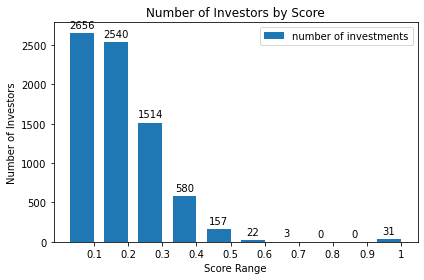

In [17]:
a.investor_count_chart()

Looking at the ranking of a sample of well-known investors is a gut-check of our ranking algorithm. 

In [18]:
a.investor_sample()

,investor_name,score,distance,investments,neighbors
233,Bill Gates,0.398020,1,68,"{'G Squared': 5, 'Asas Capital': 5, 'Alexis Oh..."
4115,Ridge Ventures,0.353824,1,169,"{'Ulu Ventures': 8, 'CRV': 34.0, 'Arbor Ventur..."
3215,Peter Thiel,0.330436,1,87,"{'8VC': 10, 'GV': 10.5, 'Google': 2, 'HOF Capi..."
424,Y Combinator,0.310991,1,4189,"{'Accel': 608.5, 'Orange': 6, 'Stripe': 39, 'L..."
5178,Redpoint eventures,0.297921,1,94,"{'500 Startups': 29, 'Founders Fund': 13.5, 'V..."
1675,M12 - Microsoft's Venture Fund,0.294076,1,227,"{'Sapphire': 21, 'DFJ Growth': 20, 'Mayfield F..."
823,WestWave Capital,0.260982,1,62,"{'FOUNDER.org': 4, 'MIG': 8, 'Floodgate': 2.0,..."
1648,Earlybird Venture Capital,0.210541,1,271,"{'Greenspring Associates': 5, 'Saints Capital'..."
341,500 Startups,0.193580,1,2684,"{'GBIC': 4, 'Zeroth.AI': 4, 'FBG Capital': 7, ..."
1575,Commerce Ventures,0.192616,1,131,"{'Fifth Third Bank': 5, 'West Capital Advisors..."


If one wants to do a further analysis then they can do so by analyzing the full dataset and the full graph of connections which can be obtained by the following commands.

In [20]:
df = a.get_data()

## Choosing a different experiment file

Note, to choose a different experiment, just change the timestamp manually in the second cell. Alternatively, run the following code to choose the file paths

### If you want to choose a different experiment .csv file run the following code

In [7]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

datadir = filenames[0]

### If you want to choose a different params .py file run the following code

In [8]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

paramdir = filenames[0]

In [9]:
a = Analyzer(datadir=datadir, paramdir=paramdir)
a.load_data()

In [10]:
a.get_parameters()

{'before_after_weights': {'before': 1, 'same time': 1, 'after': 1},
 'decay': 'linear',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

In [11]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 6, 'REV': 14, 'Google': 15, 'ZhenFund'..."
570,General Catalyst,1.000000,0,994,"{'Accel': 198, 'WndrCo': 7, 'Crowdcube': 22, '..."
564,Felicis Ventures,1.000000,0,527,"{'Sapphire': 33, 'Skip Capital': 25, 'Index Ve..."
702,Foundation Capital,1.000000,0,648,"{'DHVC': 23, 'ZhenFund': 2, 'GGV Capital': 25,..."
549,Battery Ventures,1.000000,0,778,"{'ESO Fund': 17, 'PremjiInvest': 6, 'Icon Vent..."
729,Andreessen Horowitz,1.000000,0,1110,"{'Accel': 140, 'Goldman Sachs': 39, 'Index Ven..."
740,First Round Capital,1.000000,0,821,"{'GV': 149, 'TPG Biotech': 20, 'Foresite Capit..."
528,Sequoia Capital,1.000000,0,1601,"{'Alumni Ventures': 13, 'Tenaya Capital': 140,..."
830,Union Square Ventures,1.000000,0,363,"{'SV Angel': 145, 'Lux Capital': 45, 'George B..."
510,Kleiner Perkins,1.000000,0,1310,"{'TCV': 35, 'Accel': 134, 'Focus Ventures': 69..."
